# Assignment 5: Segmentation
The objective of this assignment is to give you experience with segmentation.

In [1]:
# import libraries
import pandas as pd
customer_survey = pd.read_csv("/data/Assignment-5/CustomerSurvey.tsv", sep ='\t', header=1)

In [2]:
# pull out the column descriptions
descriptions = customer_survey.loc[0,]
descriptions

obs id                                                Observation Identifier
num eat out                Actual number of times per week that responden...
Jaes most freq             Question asked for the name of the respondent'...
sec most freq              Question asked for the name of the respondent'...
ImpConv                    How important is convenience to you in your se...
Imp Menu Variety           How important is menu variety to you in your s...
Imp Value                  How important is value to you in your selectio...
Imp healthy options        How important are healthy options to you in yo...
Imp taste                  How important is taste of the food to you in y...
Imp friendly staff         How important is the friendliness of the staff...
Imp ambiance               How important is the ambiance of the restauran...
num jaes last month        Actual number of times per month that responde...
Compare covenience         How well does Jae's compare to competitors on ...

In [3]:
# remove descriptions for clean data
df = customer_survey.drop(0)
#df.dtypes

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

df = df[df.applymap(isnumber)]
df = df.apply(pd.to_numeric)
df = df.dropna()
df

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,5.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,6.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,4.0,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0


In [4]:
# What is the variance of each column?  This might be useful in determining which columns to consider in your analysis; e.g., threshold to only use columns above a certain variance.
df.var()

obs id                     3617.714286
num eat out                   2.016436
Jaes most freq                0.234437
sec most freq                 0.193065
ImpConv                       1.548632
Imp Menu Variety              1.106777
Imp Value                     1.447371
Imp healthy options           2.980975
Imp taste                     2.867500
Imp friendly staff            1.616008
Imp ambiance                  1.482157
num jaes last month           4.732748
Compare covenience            2.154396
Compare menu variety          1.364742
Compare value                 1.496341
Compare healthy options       3.014747
Compare taste                 3.269391
Compare friendly staff        2.619779
Compare ambiance              1.494428
gender                        0.223404
age                           0.483789
income                        0.991613
hhld type                     0.484014
kids under 5                  0.426601
kids 5-12                     0.236801
kids over 12             

In [5]:
sum(df.var() >= 1.5)

11

In [6]:
df.var().sort_values(ascending=False)[1:11]

num jaes last month        4.732748
Compare taste              3.269391
Compare healthy options    3.014747
Imp healthy options        2.980975
Imp taste                  2.867500
Compare friendly staff     2.619779
Compare covenience         2.154396
num eat out                2.016436
Imp friendly staff         1.616008
ImpConv                    1.548632
dtype: float64

In [7]:
# This is an example of one way to pull out the columns you're interesed in.  (There are other good ways too, but this is easy to read.)
X = df.loc[:,['Imp healthy options', 'Imp taste','Imp friendly staff','ImpConv','num jaes last month',
              'Compare healthy options', 'Compare taste','Compare friendly staff','Compare covenience','num eat out']]
X

,Imp healthy options,Imp taste,Imp friendly staff,ImpConv,num jaes last month,Compare healthy options,Compare taste,Compare friendly staff,Compare covenience,num eat out
1,1.0,5.0,2.0,5.0,4.0,1.0,5.0,2.0,5.0,4
2,2.0,6.0,2.0,4.0,5.0,2.0,6.0,2.0,4.0,4
3,6.0,3.0,5.0,3.0,5.0,6.0,5.0,5.0,3.0,2
4,5.0,4.0,4.0,2.0,7.0,5.0,4.0,6.0,2.0,2
5,2.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
197,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3
198,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3
199,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,5.0,2
200,2.0,3.0,3.0,3.0,1.0,2.0,3.0,3.0,6.0,1


### Now, using the Session 6 activity as as guide, segment the customers and answer all the questions in the write-up requirements.

In [8]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from plotnine import *

In [9]:
# Define a helper function to sort attibutes
def sorted_attr(idx, cluster_centers, column_names):
    print("*** Sorted attributes for %d ***" % idx)
    for i in sorted(range(len(column_names)), key=lambda i: -cluster_centers[idx,i]):
        print(column_names[i], cluster_centers[idx,i])

In [10]:
# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

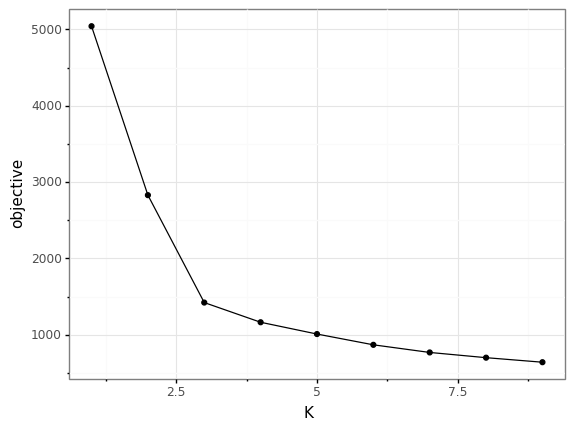

<ggplot: (-9223363278819271971)>

In [11]:
# plot the results; what K is best?
(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [13]:
kmeans.labels_

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0,
       0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [14]:
kmeans.cluster_centers_

array([[1.64814815, 1.68518519, 2.10185185, 2.28703704, 1.05555556,
        1.64814815, 1.68518519, 2.10185185, 3.41666667, 2.7962963 ],
       [1.51219512, 5.51219512, 2.        , 4.48780488, 4.51219512,
        1.58536585, 5.3902439 , 2.07317073, 4.53658537, 4.2195122 ],
       [5.5       , 3.5       , 4.5       , 2.5       , 5.775     ,
        5.5       , 4.5       , 5.5       , 2.5       , 1.825     ]])

In [15]:
sorted_attr(0, kmeans.cluster_centers_, X.columns)
sorted_attr(1, kmeans.cluster_centers_, X.columns)
sorted_attr(2, kmeans.cluster_centers_, X.columns)

*** Sorted attributes for 0 ***
Compare covenience 3.416666666666667
num eat out 2.7962962962962963
ImpConv 2.2870370370370363
Compare friendly staff 2.101851851851852
Imp friendly staff 2.101851851851851
Compare taste 1.6851851851851856
Imp taste 1.6851851851851853
Imp healthy options 1.6481481481481484
Compare healthy options 1.6481481481481466
num jaes last month 1.0555555555555514
*** Sorted attributes for 1 ***
Imp taste 5.51219512195122
Compare taste 5.390243902439023
Compare covenience 4.536585365853658
num jaes last month 4.512195121951219
ImpConv 4.48780487804878
num eat out 4.219512195121952
Compare friendly staff 2.0731707317073162
Imp friendly staff 1.9999999999999998
Compare healthy options 1.5853658536585369
Imp healthy options 1.5121951219512193
*** Sorted attributes for 2 ***
num jaes last month 5.774999999999998
Imp healthy options 5.500000000000002
Compare friendly staff 5.500000000000002
Compare healthy options 5.4999999999999964
Compare taste 4.500000000000001
Imp f

In [16]:
# append the clusters to the data
clustered_data = df.join(pd.DataFrame({'cluster': kmeans.labels_}))
clustered_data

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,cluster
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,2.0
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,NaN
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,NaN
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN


In [17]:
pd.crosstab(clustered_data.cluster,[clustered_data.gender,clustered_data.age])

gender  1.0             2.0            
age     1.0 2.0 3.0 4.0 1.0 2.0 3.0 4.0
cluster                                
0.0       6  18  39   4   2  27   7   2
1.0       1   9  17   1   1   3   2   1
2.0       2  10   8   1   1  10   4   0

In [18]:
pd.crosstab(clustered_data.cluster,[clustered_data.income,clustered_data['hhld type']])

income    1.0         2.0         3.0         4.0    
hhld type 1.0 2.0 3.0 1.0 2.0 3.0 1.0 2.0 3.0 2.0 3.0
cluster                                              
0.0        11  20   3   9  25   0   0  14  11   1  11
1.0         3   2   0   3   7   0   2   7   5   0   6
2.0        12   6   1   1   6   2   1   4   2   0   1

In [19]:
print(pd.crosstab(clustered_data.cluster,clustered_data['gender']))
print(pd.crosstab(clustered_data.cluster,clustered_data['age']))
print(pd.crosstab(clustered_data.cluster,clustered_data['income']))
print(pd.crosstab(clustered_data.cluster,clustered_data['hhld type']))
print(pd.crosstab(clustered_data.cluster,clustered_data['kids under 5']))
print(pd.crosstab(clustered_data.cluster,clustered_data['kids 5-12']))
print(pd.crosstab(clustered_data.cluster,clustered_data['kids over 12']))

gender   1.0  2.0
cluster          
0.0       67   38
1.0       28    7
2.0       21   15
age      1.0  2.0  3.0  4.0
cluster                    
0.0        8   45   46    6
1.0        2   12   19    2
2.0        3   20   12    1
income   1.0  2.0  3.0  4.0
cluster                    
0.0       34   34   25   12
1.0        5   10   14    6
2.0       19    9    7    1
hhld type  1.0  2.0  3.0
cluster                 
0.0         20   60   25
1.0          8   16   11
2.0         14   16    6
kids under 5  0.0  1.0  2.0
cluster                    
0.0            83   11   11
1.0            26    4    5
2.0            32    2    2
kids 5-12  0.0  1.0  2.0  3.0
cluster                      
0.0         90   12    3    0
1.0         27    5    2    1
2.0         33    3    0    0
kids over 12  0.0  1.0  2.0
cluster                    
0.0           103    2    0
1.0            33    1    1
2.0            34    2    0


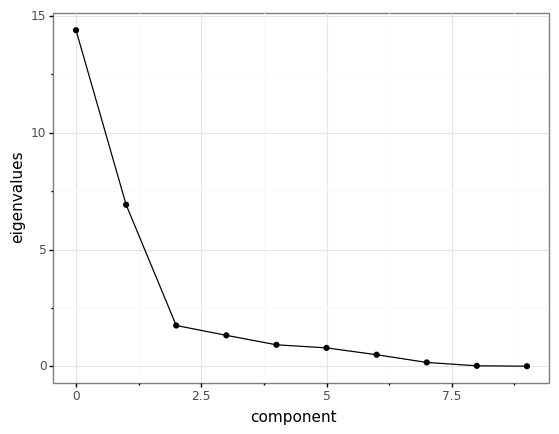

<ggplot: (8758025717347)>

In [20]:
# scree plot
from sklearn.decomposition import PCA
pca = PCA().fit(X)
scree_data = pd.DataFrame({'eigenvalues': pca.explained_variance_, 
                           'component': range(len(pca.explained_variance_))})
# plot the results; what K is best?
(ggplot(scree_data)                      # defining what data to use
 + aes(x='component', y='eigenvalues')   # map variables to attributes
 + geom_point() + geom_line()            # defining the type of geometric objects to use
 + theme_bw()                            # other aestheic attributes
)

In [21]:
transformer = FactorAnalysis(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X)
transformer.components_
sorted_attr(0, transformer.components_, X.columns)
sorted_attr(1, transformer.components_, X.columns)

*** Sorted attributes for 0 ***
num jaes last month 1.8083037776134694
Compare healthy options 1.5462342649194034
Imp healthy options 1.544401635349379
Compare taste 1.3774775775892711
Compare friendly staff 1.2606072215091586
Imp taste 1.0201247749073865
Imp friendly staff 0.9406549780547426
ImpConv 0.2639378021808645
num eat out -0.26487305717655857
Compare covenience -0.266177557264185
*** Sorted attributes for 1 ***
Imp taste 1.3384917477756206
Compare taste 1.0509577466280287
ImpConv 0.7728646488168681
num eat out 0.7200354587982125
num jaes last month 0.6663823997342571
Compare covenience 0.4920676107317662
Imp friendly staff -0.4161156369149706
Compare friendly staff -0.4712913046000749
Compare healthy options -0.7324124859736214
Imp healthy options -0.7481917390326317


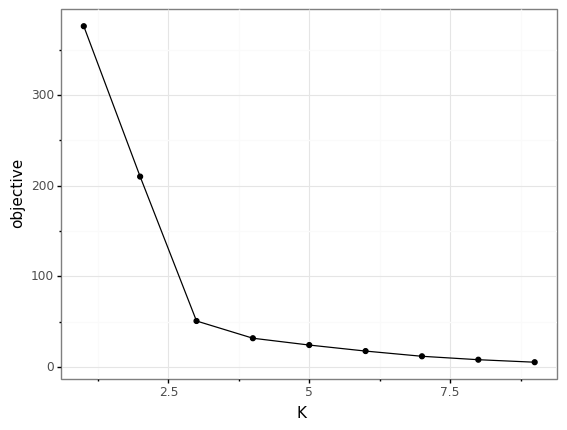

<ggplot: (-9223363278829090756)>

In [22]:
# Let's cluster based on the FA scores

# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_transformed)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

# plot the results; what K is best?
(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)

### At some point, you will also need to use the noncustomer survey data...
Note: the simplest approach in this phase of your analysis will be to use crosstabs on the noncustomer survey data.

In [23]:
noncustomer_survey = pd.read_csv("/data/Assignment-5/NoncustomerSurvey.tsv", sep ='\t', header=1)

In [24]:
# pull out the column descriptions
noncustomer_descriptions = noncustomer_survey.loc[0,]
noncustomer_descriptions

obs                                                          Observation Identifier
#times/wk eat lunch/dinner out    Actual number of times per week that responden...
FCR most freq                     Question asked for the name of the respondent'...
FCR sec most freq                 Question asked for the name of the respondent'...
Imp convenient                    How important is convenience to you in your se...
Imp menu variety                  How important is menu variety to you in your s...
Imp value                         How important is value to you in your selectio...
Imp healty options                How important are healthy options to you in yo...
Imp taste                         How important is taste of the food to you in y...
Imp friendly staff                How important is the friendliness of the staff...
Imp ambience                      How important is the ambiance of the restauran...
gender                                                   Gender:  1= Female,

In [25]:
# remove descriptions for clean data
noncustomer_df = noncustomer_survey.drop(0)

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

noncustomer_df = noncustomer_df[noncustomer_df.applymap(isnumber)]
noncustomer_df = noncustomer_df.apply(pd.to_numeric)
noncustomer_df

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area
1,5,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,12,3.0,0.0,0.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
3,17,6.0,1.0,0.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
4,29,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2
5,105,1.0,1.0,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,250,1.0,NaN,NaN,1,3.0,1,5.0,1,5.0,3,2.0,3.0,1.0,1.0,0.0,0.0,0.0,2
177,255,2.0,NaN,NaN,2,2.0,1,2.0,1,2.0,2,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1
178,258,1.0,NaN,NaN,1,1.0,1,1.0,1,1.0,1,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2
179,264,5.0,NaN,NaN,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1


In [26]:
pd.crosstab(noncustomer_df.area,noncustomer_df.gender)

gender,1.0,2.0
area,,
1,27,61
2,81,8


In [27]:
pd.crosstab(noncustomer_df.area,noncustomer_df.age)

age,1.0,2.0,3.0,4.0
area,,,,
1,24,45,13,6
2,6,27,53,3


In [28]:
pd.crosstab(noncustomer_df.area,noncustomer_df.income)

income,1.0,2.0,3.0,4.0
area,,,,
1,59,25,4,0
2,21,7,42,19


In [29]:
pd.crosstab(noncustomer_df.area,noncustomer_df['hhld type'])

hhld type,1.0,2.0,3.0
area,,,
1,51,32,5
2,10,15,64


In [30]:
pd.crosstab(noncustomer_df.area,noncustomer_df['Imp convenient'])

Imp convenient,1,2,3,4,5,6
area,,,,,,
1,16,12,3,38,20,1
2,14,50,25,1,0,0


In [31]:
pd.crosstab(noncustomer_df.area,noncustomer_df['Imp healty options'])

Imp healty options,1.0,2.0,3.0,4.0,5.0,6.0
area,,,,,,
1,51,34,3,0,1,0
2,10,15,4,1,22,38


In [32]:
pd.crosstab(noncustomer_df.area,noncustomer_df['Imp taste'])

Imp taste,1,2,3,4,5,6
area,,,,,,
1,26,6,0,18,20,20
2,28,1,20,39,1,1
